In [1]:
from patchworklib import patchwork as pw 

<Figure size 72x72 with 0 Axes>

## Patchworklib: patchwork for matplotlib
The patchworklib module provides the Brick class that is the subclass of matplotlib.axes.Axes.  
Each subclass object can be joined with other Brick class objects by using "|" or "/" operands.  
When creating a Brick class object, 'figsize' and 'label' property should be specified, and the 'label' value should be unique among the Brick class objects generated in a script.  
The 'figsize' of an object of the Brick class is not a fixed value. It may be changed in the process of aligning multiple graphs on a tidy layout.   
However, the aspect ratio of each Brick is basically preserved in the process.

For details, see the following example.

### 1. Basic usage: Arrange multiple axes objects with different aspect ratios

In [2]:
ax1 = pw.Brick("ax1",(2,2))
ax2 = pw.Brick("ax2",(2,4)) 
ax1.set_title("ax1")
ax2.set_title("ax2") 

Text(0.5, 1.0, 'ax2')

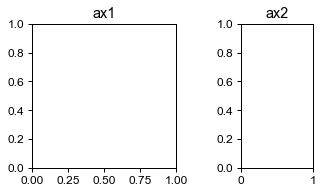

In [3]:
#arrange two Brick class objects with the horizontal direction.
ax12 = ax1 | ax2
ax12.savefig(fname=None) #If 'fname' is Noen, it just return a figure object.  

In the above case, the heights of 'ax1' and ax2' are same. Therefore, their figure size has not beenchanged.

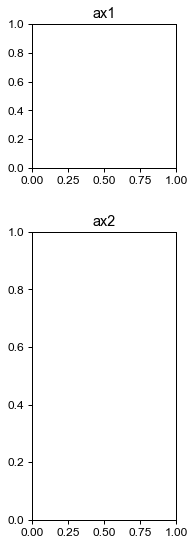

In [4]:
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 / ax2
ax12.savefig(fname=None) 

In this case, the original width of 'ax2' is shorter than ax1. Therefore, the size of 'ax2' has not been automatically expanded to match their width. 

The joined 'ax1' and 'ax2' is returned as Bricks class objects that holds multiple Brick class objects.  
Bricks class objects can also be joined with other Brick and Bricks class objects as follows.

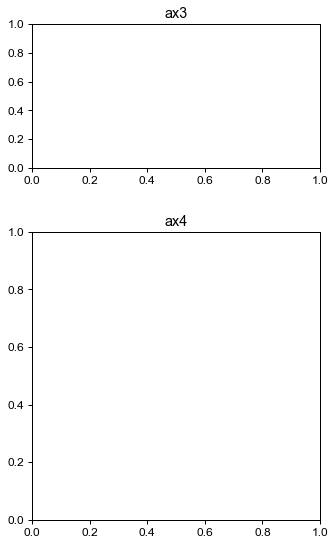

In [5]:
ax3 = pw.Brick("ax3",(4,2))
ax4 = pw.Brick("ax4",(4,4))
ax3.set_title("ax3")
ax4.set_title("ax4") 
ax34 = ax3/ax4
ax34.savefig(fname=None)

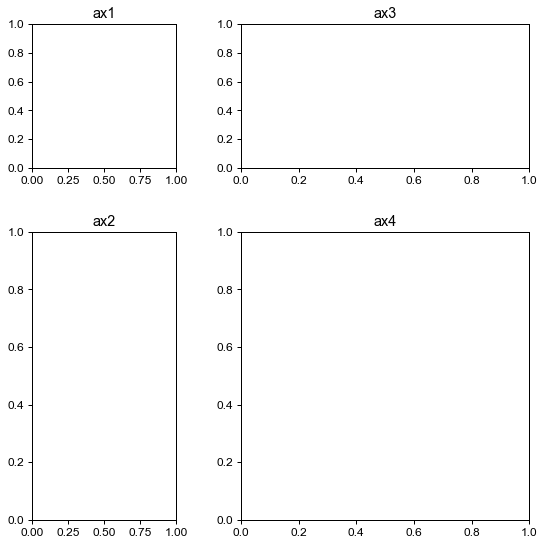

In [6]:
ax1234 = ax12 | ax34
ax1234.savefig(fname=None)

In [7]:
pw.clear() #Delete all Brick objects created so far.

### 2. Arrange multiple seaborn 
Seaborn provides functions for drawing attractive statistical graphics. However, they do not provide the function to arrange the multiple graphs generated using seaborn.
By using patchworklib, you can easily arrange seaborn plots the way you want.

In [8]:
import seaborn as sns
import numpy  as np
import pandas as pd

#Sample data for axies object
fmri = sns.load_dataset("fmri")
tips = sns.load_dataset("tips")
diamonds = sns.load_dataset("diamonds")
titanic = sns.load_dataset("titanic")
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

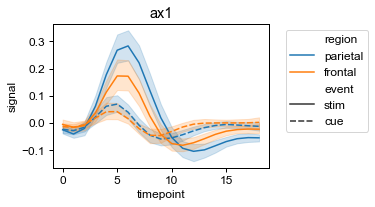

In [9]:
ax1 = pw.Brick("ax1", figsize=(3,2))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title("ax1")
ax1.savefig() 

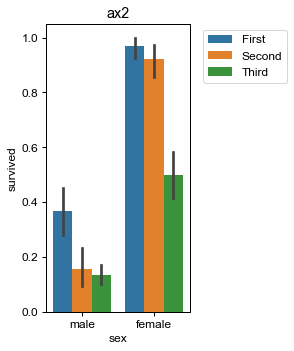

In [10]:
ax2 = pw.Brick("ax2", figsize=(2,4))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.set_title("ax2")
ax2.savefig()

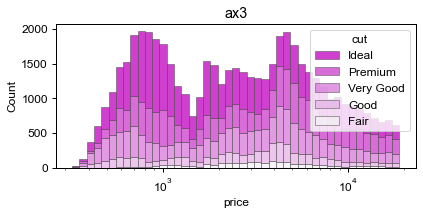

In [11]:
ax3 = pw.Brick("ax3", (5,2))
sns.histplot(diamonds, x="price", hue="cut", multiple="stack",
    palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True,
    ax = ax3)
ax3.set_title("ax3")
ax3.savefig()

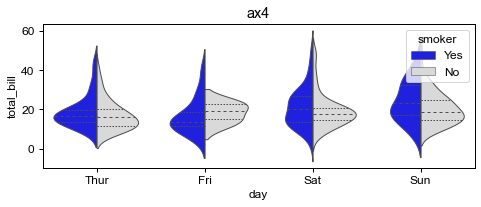

In [12]:
ax4 = pw.Brick("ax4", (6,2))
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
    split=True, inner="quart", linewidth=1,
    palette={"Yes": "b", "No": ".85"},
    ax=ax4)
ax4.set_title("ax4")
ax4.savefig()

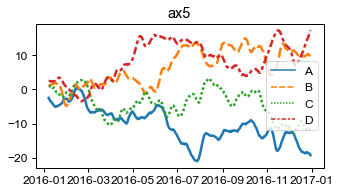

In [13]:
ax5 = pw.Brick("ax5", (4,2))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_title("ax5")
ax5.savefig()

**Let's align them**

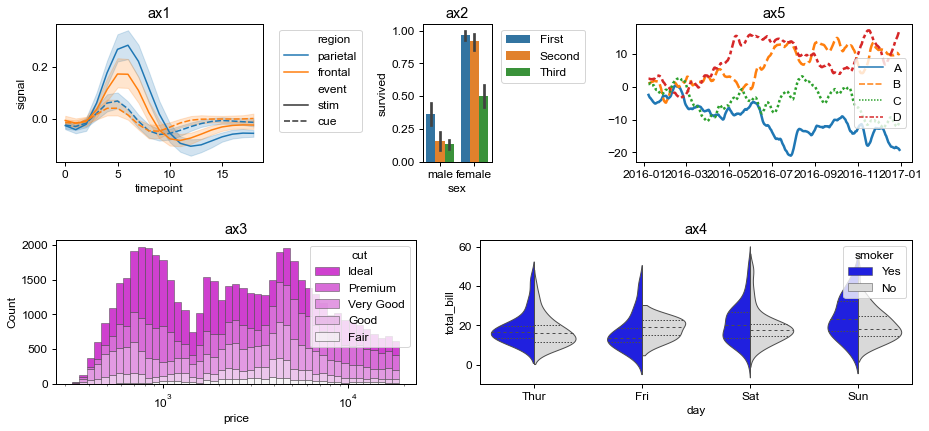

In [14]:
ax12543 = (ax1|ax2|ax5)/(ax3|ax4)
ax12543.savefig()

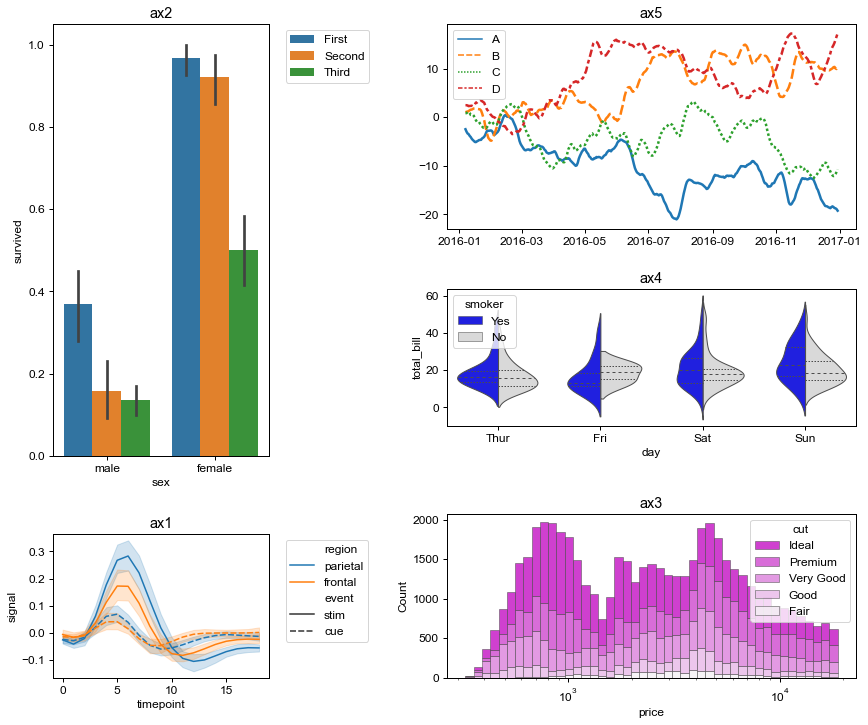

In [15]:
ax21543 = (ax2/ax1)|(ax5/ax4/ax3)
ax21543.savefig()

In [33]:
pw.clear() #Delete all Brick objects created so far.

### 3: Advanced usage: Joint plot
Sorry, I will add explanation. Anyway, patchplotlib enables creating jointplot with the following code.

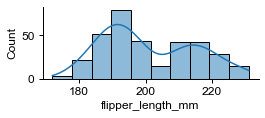

In [34]:
penguins = sns.load_dataset("penguins")
ax1 = pw.Brick("ax1", figsize=(3,1))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax1)
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
ax1.savefig()

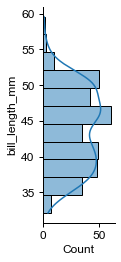

In [35]:
ax2 = pw.Brick("ax2", figsize=(1,3))
sns.histplot(data=penguins, y="bill_length_mm", kde=True, ax=ax2)
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False)
ax2.savefig()

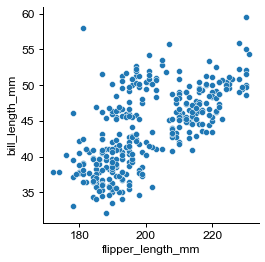

In [36]:
ax3 = pw.Brick("ax3", figsize=(3,3))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax3)
ax3.spines["top"].set_visible(False) 
ax3.spines["right"].set_visible(False)
ax3.savefig()

In [37]:
ax1.set_xlim(ax3.get_xlim())
ax1.set_xticks([])
ax1.set_xlabel("") 

ax2.set_ylim(ax3.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel("")

Text(0, 0.5, '')

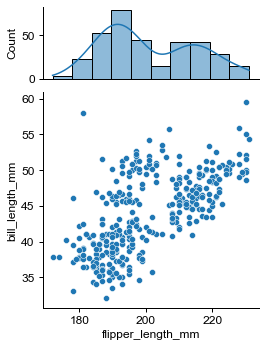

In [38]:
pw.param["margin"] = 0.1 #default value is 0.4
ax13 = ax1 / ax3
ax13.savefig()

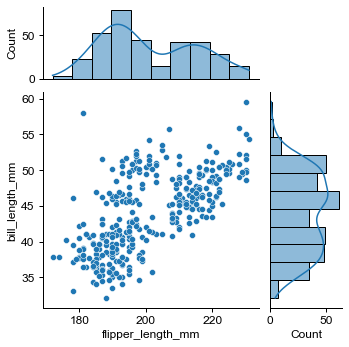

In [39]:
ax132 = ax13["ax3"] | ax2
ax132.savefig()

Off course, you can align multiple joint plots

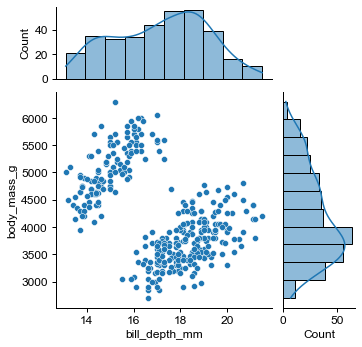

In [40]:
ax4 = pw.Brick("ax4", figsize=(3,1))
sns.histplot(data=penguins, x="bill_depth_mm", kde=True, ax=ax4)
ax4.spines["top"].set_visible(False) 
ax4.spines["right"].set_visible(False)

ax5 = pw.Brick("ax5", figsize=(1,3))
sns.histplot(data=penguins, y="body_mass_g", kde=True, ax=ax5)
ax5.spines["top"].set_visible(False) 
ax5.spines["right"].set_visible(False)
ax5.savefig()

ax6 = pw.Brick("ax6", figsize=(3,3))
sns.scatterplot(data=penguins, x="bill_depth_mm", y="body_mass_g", ax=ax6)
ax6.spines["top"].set_visible(False) 
ax6.spines["right"].set_visible(False)
ax6.savefig()

ax4.set_xlim(ax4.get_xlim())
ax4.set_xticks([])
ax4.set_xlabel("") 

ax5.set_ylim(ax5.get_ylim())
ax5.set_yticks([])
ax5.set_ylabel("")

ax46 = ax4 / ax6
ax465 = ax46["ax6"] | ax5
ax465.savefig()

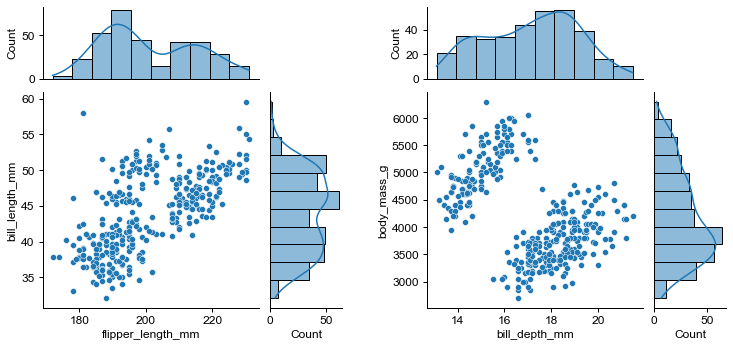

In [41]:
pw.param["margin"] = 0.5
ax132465 = ax132 | ax465
ax132465.savefig()